# 三层感知机

包含一个隐含层的人工神经网络

In [1]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#  activation function
from scipy.special import expit
def sigmoid(x):
    #return 1/(1+np.exp(-x))
    return expit(x)

# activation function 的导数
def sigmoid_derivative(x):
    return x * (1-x)


## 分类

### 生成数据集

利用 `sklearn.datasets` 中的标准数据集

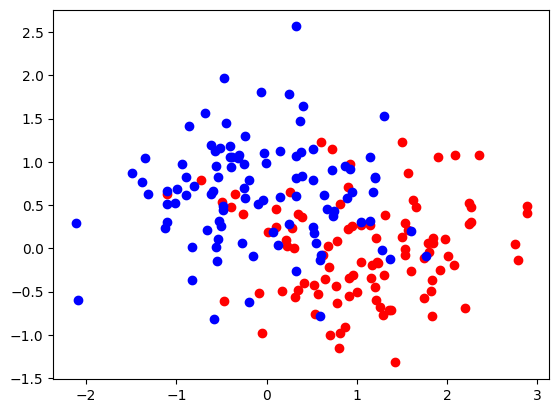

In [2]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons

#XX_train,yy_train = make_blobs(n_samples=200, centers=2, n_features=2)
#XX_test,yy_test = make_blobs(n_samples=60, centers=2, n_features=2)
XX_train,yy_train = make_moons(n_samples= 200, shuffle = True, noise=0.5, random_state=44)
XX_test,yy_test = make_moons(n_samples= 60, shuffle = True, noise=0.5, random_state=44)


#XX_train,yy_train = make_circles(n_samples= 200, noise= 0.1,factor=0.8,random_state= 2)
#XX_test,yy_test = make_circles(n_samples = 60, noise= 0.1,factor=0.8,random_state= 2)
#XX_train,yy_train = make_moons(n_samples= 100, shuffle = True, noise=0.5, random_state=44)
#XX_test,yy_test = make_moons(n_samples= 30, shuffle = True, noise=0.5, random_state=44)

plt.plot(XX_train[np.where(yy_train == 1),0],XX_train[(np.where(yy_train == 1)),1],'ro');
plt.plot(XX_train[np.where(yy_train == 0),0],XX_train[(np.where(yy_train == 0)),1],'bo');

### 反向传播 by batch GD

In [3]:
# 重要参数
n_iter = 1000000  # 迭代次数
alpha = 0.2    # 学习率
m = XX_train.shape[0] # 训练样本数
input_dimension = XX_train.shape[1] # 输入特征维数
hidden_layer_1_dimension =10  #对于单隐含层，神经元个数越大，步长要越小 比如，h1=1000,alpha = 0.04
output_dimension = 1 # 输出维数

X_train = XX_train
y_train = yy_train.reshape(-1,1) #注意这里对 yy 要 reshape 成2维数组以便做矩阵运算

X_test = XX_test
y_test = yy_test.reshape(-1,1) #注意这里对 yy 要 reshape 成2维数组以便做矩阵运算

# 权重随机初始化，标准高斯函数，包含偏置项
np.random.seed(44)
Omega1 = np.random.randn(input_dimension+1,hidden_layer_1_dimension)# 1.W
Omega2 = np.random.randn(hidden_layer_1_dimension+1,output_dimension)# 2.W

# 记录训练过程
J_train = np.empty(n_iter) # loss 
ii = np.empty(n_iter) # 迭代次数
Accuracy_train = np.empty(n_iter) #精度

J_test = np.empty(n_iter) # loss
#ii = np.empty(n_iter) # 迭代次数
Accuracy_test = np.empty(n_iter) #精度

# 开始训练，终止条件为最大迭代次数
for i in np.arange(n_iter):
    
    # forward

    a1 = X_train # 1.in
    a11 = np.insert(a1,0,values=1,axis=1)  #1.b
    Z2 = np.dot(a11,Omega1) #1.z
    
    a2 = sigmoid(Z2)#1.a #2.in
    
    a21 = np.insert(a2,0,values=1,axis=1)#2.b
    Z3 = np.dot(a21,Omega2) #2.z
    a3 = sigmoid(Z3) #2.a
    # 分类问题，最后一层的激活函数也是 sigmod

    # 计算 cost function --  交叉熵
    H=np.log10(a3+1e-8)
    H1 =np.log10(1-a3+1e-8) 
    Y1=1-y_train
    J_train[i] = -(np.dot(y_train.T,H)+np.dot(Y1.T,H1))/m
    ii[i] = i
    
    # 计算分类精度
    tp = len(np.where((a3 >= 0.5) & (y_train == 1))[0])
    tn = len(np.where((a3 < 0.5) & (y_train == 0))[0])
    Accuracy_train[i] = (tp+tn)/m
    
       
    # backpropagation

    delta3 = a3 - y_train#z_grad #2.z
    d_Omega2 = np.dot(a21.T,delta3)#W_grad #2.W
     #= #2.d #1.z 
    delta2 = np.dot(delta3,Omega2[1:,:].T)*sigmoid_derivative(a2)#*a_grad 
    d_Omega1 = np.dot(a11.T,delta2)

    # update weights

    Omega1 = Omega1 - alpha*d_Omega1/m #+ np.random.randn(1)*0.0002
    Omega2 = Omega2 - alpha*d_Omega2/m #+ np.random.randn(1)*0.0002
    
    # test
    a1 = X_test# input
    a11 = np.insert(a1,0,values=1,axis=1)#b
    Z2 = np.dot(a11,Omega1)#z
    a2 = sigmoid(Z2)#a===inp
    a21 = np.insert(a2,0,values=1,axis=1)#b
    Z3 = np.dot(a21,Omega2)#z
    a3 = sigmoid(Z3) #a 分类问题，最后一层的激活函数也是 sigmod

    # 计算 cost function --  交叉熵
    H = np.log10(a3+1e-8)
    H1 = np.log10(1-a3+1e-8) 
    Y1=1 - y_test
    J_test[i] = -(np.dot(y_test.T,H)+np.dot(Y1.T,H1))/len(y_test)
    #ii[i] = i
    
    # 计算分类精度
    tp = len(np.where((a3 >= 0.5) & (y_test == 1))[0])
    tn = len(np.where((a3 < 0.5) & (y_test == 0))[0])
    Accuracy_test[i] = (tp+tn)/len(y_test)


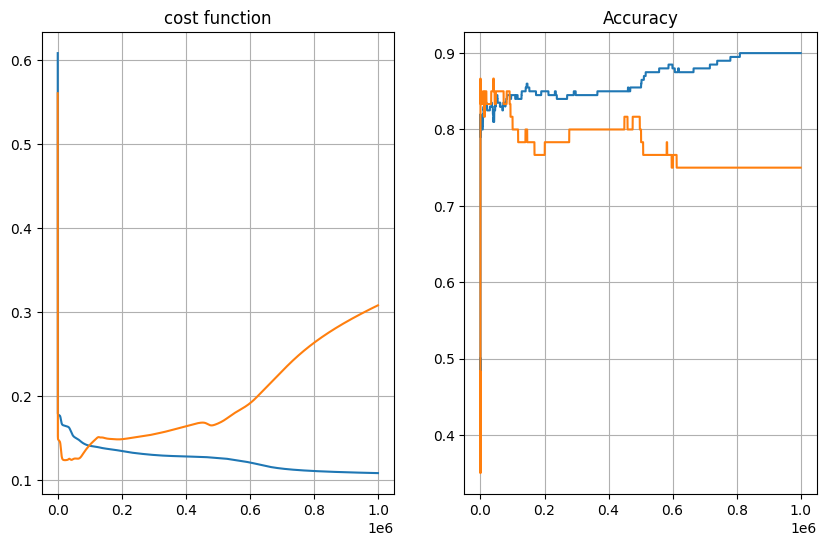

In [4]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.grid(True)
plt.plot(ii,J_train)
plt.plot(ii,J_test)
plt.title("cost function");
plt.subplot(122)
plt.grid(True)
plt.plot(ii,Accuracy_train)
plt.plot(ii,Accuracy_test)
plt.title("Accuracy");

### 测试结果

In [5]:
m_test = XX_test.shape[0]
X_test = XX_test
y_test = yy_test.reshape(-1,1) 

a1 = X_test
a11 = np.insert(a1,0,values=1,axis=1)
Z2 = np.dot(a11,Omega1)
a2 = sigmoid(Z2)
a21 = np.insert(a2,0,values=1,axis=1)
Z3 = np.dot(a21,Omega2)
a3 = sigmoid(Z3)

# 计算分类精度
#tp = len(np.where((a3 >= 0.5) & (y_test == 1))[0])
#tn = len(np.where((a3 < 0.5) & (y_test == 0))[0])
#Accuracy_test = (tp+tn)/m_test

print("Train Accuracy: %1.3f" % Accuracy_train[-1])
print("=="*12)
print("Test  Accuracy: %1.3f" % Accuracy_test[-1])

Train Accuracy: 0.900
Test  Accuracy: 0.750


### 分类边界

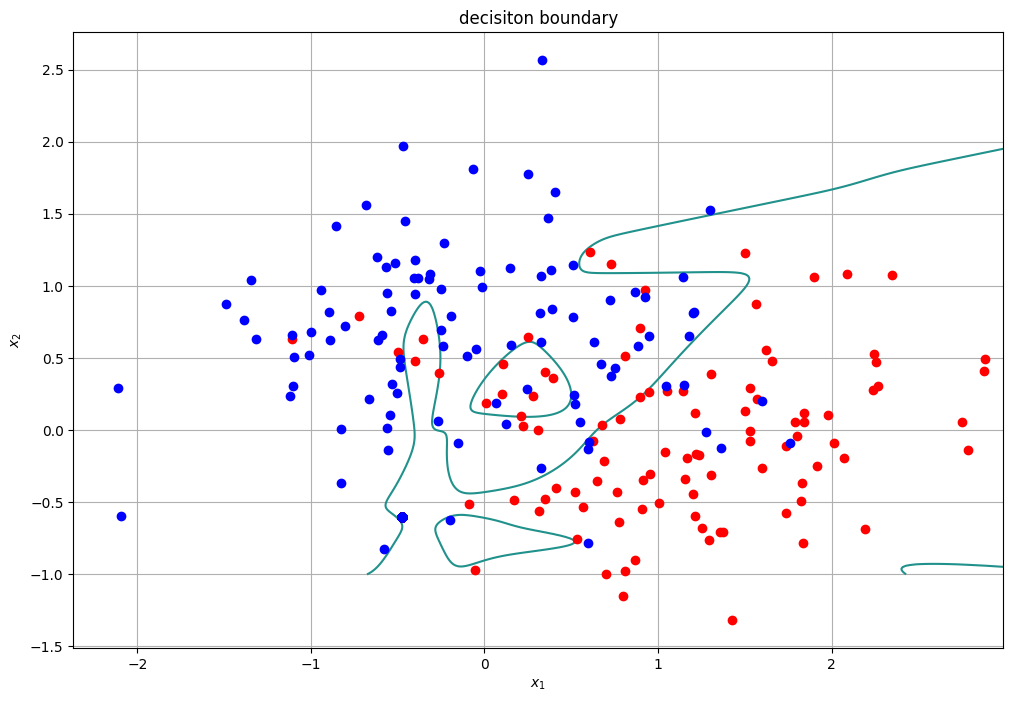

In [6]:
x,y = np.meshgrid(np.arange(-2,3,0.01),np.arange(-1,2,0.01))
XY = np.c_[x.ravel(),y.ravel()]

a1 = XY
a11 = np.insert(a1,0,values=1,axis=1)
Z2 = np.dot(a11,Omega1)
a2 = sigmoid(Z2)
a21 = np.insert(a2,0,values=1,axis=1)
Z3 = np.dot(a21,Omega2)
a3 = sigmoid(Z3)

z = Z3
z = z.reshape(x.shape)

plt.figure(figsize=(12,8))
#plt.contourf(x, y, z,1,cmap=plt.cm.Spectral)
plt.contour(x, y, z,0,)#cmap=plt.cm.Spectral)

plt.plot(X_train[np.where(y_train == 1),0],X_train[(np.where(y_train == 1)),1],'ro');
plt.plot(X_train[np.where(y_train == 0),0],X_train[(np.where(y_train == 0)),1],'bo');
#plt.plot(X_test[np.where(yy_test == 1),0],X_test[(np.where(y_test == 1)),1],'rx');
#plt.plot(X_test[np.where(yy_test == 0),0],X_test[(np.where(y_test == 0)),1],'bx');
plt.grid(True)
plt.xlabel("$x_1$");
plt.ylabel("$x_2$");
plt.title("decisiton boundary");

## 函数拟合

### 训练集

$y = \sin (p x)$, $p$ 可控制函数的复杂度。

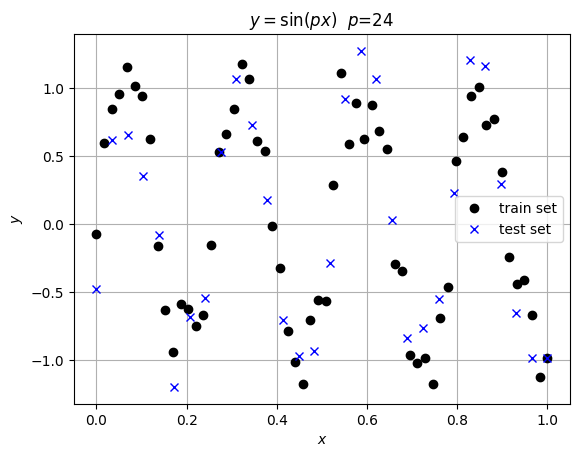

In [7]:
m = 60 # 训练集样本数
m_test = 30 #测试集样本数
p = 24 # 待拟合函数的频率 以此来调节函数的复杂性
rs = 0.2
np.random.seed(32)
XX_train = np.linspace(0,1,m).reshape(-1,1)
yy_train = np.sin(p*XX_train)+ rs*np.random.randn(XX_train.shape[0],XX_train.shape[1])
XX_test = np.linspace(0,1,m_test).reshape(-1,1)
yy_test = np.sin(p*XX_test)+ rs*np.random.randn(XX_test.shape[0],XX_test.shape[1])
plt.plot(XX_train,yy_train,'ko',label="train set");
plt.plot(XX_test,yy_test,'bx',label = "test set")

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(r"$y = \sin(p x)$"+"  "+ r"$p$" +'='+str(p))
plt.grid(True)
plt.legend(loc="best");

### 反向传播

In [8]:
#  activation function
#def sigmoid(x):
#    return 1/(1+np.exp(-x))

# activation function 的导数
#def sigmoid_derivative(x):
#    return x * (1-x)

# 重要参数
n_iter = 20000 # 迭代步数
alpha = 0.1 # 学习率
m = XX_train.shape[0] # 训练样本数

input_dimension = XX_train.shape[1]
hidden_layer_1_dimension = 10 # 20 可以轻松学得
output_dimension = yy_train.shape[1]

X_train = XX_train
X_test = XX_test
y_train = yy_train.reshape(-1,1)
y_test = yy_test.reshape(-1,1)



# 初始化权重
np.random.seed(44) # 固定初始权重，使每次学习结果都一样
Omega1 = np.random.randn(input_dimension+1,hidden_layer_1_dimension)
Omega2 = np.random.randn(hidden_layer_1_dimension+1,output_dimension)

# 纪录每步的 loss function
J = np.empty(n_iter)
ii = np.empty(n_iter)


# 开始训练
for i in np.arange(n_iter):
    
    # forward

    a1 = X_train
    a11 = np.insert(a1,0,values=1,axis=1)
    
    Z2 = np.dot(a11,Omega1)
    a2 = sigmoid(Z2)
    
    a21 = np.insert(a2,0,values=1,axis=1)
    Z3 = np.dot(a21,Omega2)
    a3 = Z3  # 回归问题,最后一层激活函数是 f(x)=x

    # 计算 cost function
    
    J[i] = np.dot((a3-y_train).T,(a3-y_train))/2/m
    ii[i] = i

   
    
    # backpropagation

    delta3 = a3 - y_train
    
    d_Omega2 = np.dot(a21.T,delta3)
    delta2 = np.dot(delta3,Omega2[1:,:].T)*sigmoid_derivative(a2)
    
    d_Omega1 = np.dot(a11.T,delta2)

    # update weights
    #alpha = 0.01 * (np.exp(-i/10000))

    Omega1 = Omega1 - alpha*d_Omega1/m 
    Omega2 = Omega2 - alpha*d_Omega2/m

Loss function: 0.268
training err: 0.732


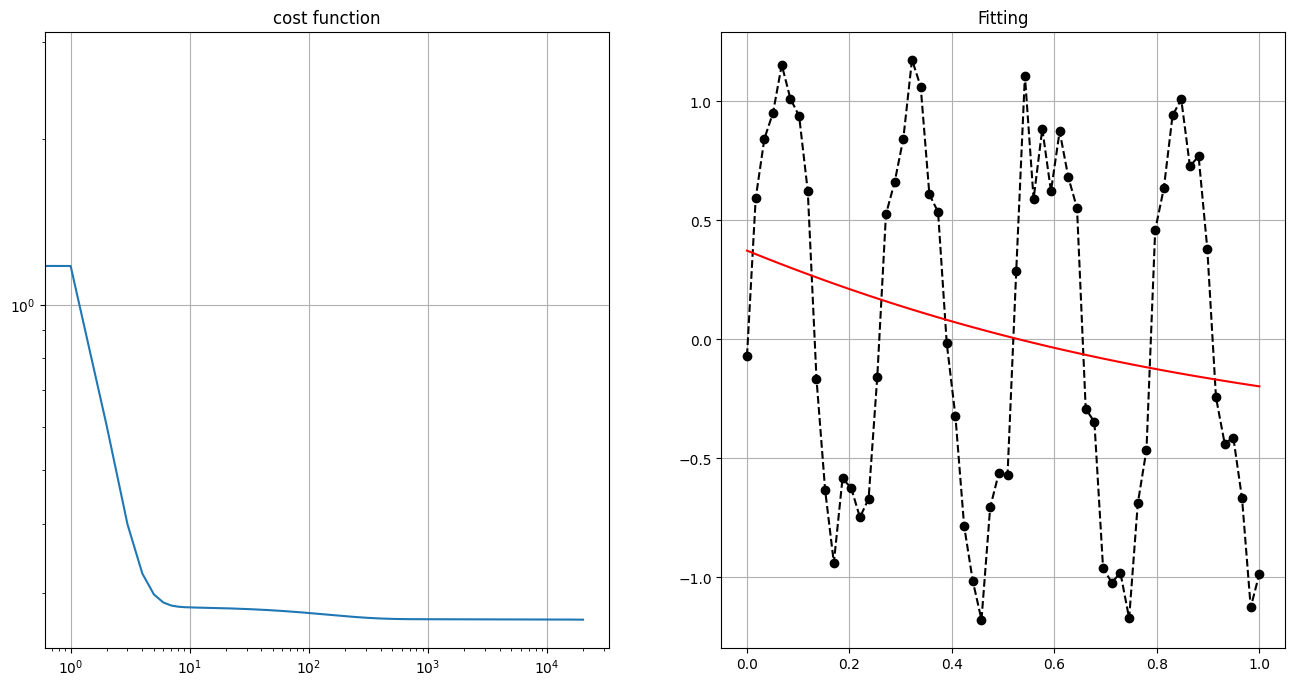

In [9]:
print("Loss function: %1.3f"%J[-1])
print("training err: %1.3f"%(np.sqrt(2*J[n_iter-1])))

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.loglog(J)
plt.title("cost function");
plt.grid(True)
#plt.xlim(600000,640000)
#plt.ylim(0.,0.5)

plt.subplot(122)

plt.title("Fitting");
plt.plot(XX_train,yy_train,'k--o');
plt.plot(X_train,a3,"r-");
plt.grid(True)

## 多层感知机参考代码

In [ ]:
# h2 两个隐含层

# forward

    a1 = X_train
    a11 = np.insert(a1,0,values=1,axis=1)
    
    Z2 = np.dot(a11,Omega1)
    a2 = sigmoid(Z2)
    a21 = np.insert(a2,0,values=1,axis=1)
    
    Z3 = np.dot(a21,Omega2)
    a3 = sigmoid(Z3)
    a31 = np.insert(a3,0,values=1,axis=1)
    
    Z4 = np.dot(a31,Omega3)
    a4 = Z4

    # 计算 cost function
    
    J[i] = np.dot((a4-y_train).T,(a4-y_train))/2/m
    ii[i] = i

   
    
    # backpropagation

    delta4 = a4 - y_train
    
    d_Omega3 = np.dot(a31.T,delta4)
    delta3 = np.dot(delta4,Omega3[1:,:].T)*sigmoid_derivative(a3)
    
    d_Omega2 = np.dot(a21.T,delta3)    
    delta2 = np.dot(delta3,Omega2[1:,:].T)*sigmoid_derivative(a2)
    
    d_Omega1 = np.dot(a11.T,delta2)

    # update weights

    Omega1 = Omega1 - alpha*d_Omega1/m 
    Omega2 = Omega2 - alpha*d_Omega2/m
    Omega3 = Omega3 - alpha*d_Omega3/m
    

In [344]:
# h3 三个隐含层

# forward

    a1 = X_train #1.in
    a11 = np.insert(a1,0,values=1,axis=1)#1.b
    
    Z2 = np.dot(a11,Omega1)#1.z
    a2 = sigmoid(Z2)#1.a #2.in
    a21 = np.insert(a2,0,values=1,axis=1)#2.b
    
    Z3 = np.dot(a21,Omega2)#2.z
    a3 = sigmoid(Z3)#2.a #3.in
    a31 = np.insert(a3,0,values=1,axis=1)# 3.b
    
    Z4 = np.dot(a31,Omega3)# 3.z
    #####
    a4 = sigmoid(Z4)#3.a #4.in
    a41 = np.insert(a4,0,values=1,axis=1)#4.b
    
    Z5 = np.dot(a41,Omega4)#4.z
    a5 = Z5 #4.a

    # 计算 cost function
    
    J[i] = np.dot((a5-y_train).T,(a5-y_train))/2/m
    ii[i] = i

   
    
    # backpropagation
    ###
    delta5 = a5 - y_train #4.zg
    d_Omega4 = np.dot(a41.T,delta5)#4.w=4.b,4.
                #4.d==3.zg                 #3.ag
    
    delta4 =  np.dot(delta5,Omega4[1:,:].T)
    
    d_Omega3 = np.dot(a31.T,delta4*sigmoid_derivative(a4)) 
      
    delta3 = np.dot(delta4,Omega3[1:,:].T)
    d_Omega2 = np.dot(a21.T,delta3*sigmoid_derivative(a3)) 
    
    delta2 = np.dot(delta3,Omega2[1:,:].T)
    d_Omega1 = np.dot(a11.T,delta2*sigmoid_derivative(a2))

    # update weights

    Omega1 = Omega1 - alpha*d_Omega1/m #W1
    Omega2 = Omega2 - alpha*d_Omega2/m #W2
    Omega3 = Omega3 - alpha*d_Omega3/m #W3
    Omega4 = Omega4 - alpha*d_Omega4/m #W4

IndentationError: unexpected indent (<ipython-input-344-278bee0ea93d>, line 5)